> # EDA On Google Playstore Data

### About Dataset

> - Description\
The Data Set was downlaoded from kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

- Context:
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- Content
Each app (row) has values for catergory, rating, size, and more.

- Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

- Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# THIS is for jupyter notebook to show the plots in the notebook itself

# 2. Data Loading and Exploration | Cleaning

- Let's load the csv file

In [ ]:
df = pd.read_csv('../5_Datasets/googleplaystore.csv')

- Key Points to Know

In [ ]:
# to display all the columns and rows in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Hide all Warning
import warnings
warnings.filterwarnings('ignore')

- Let's have a look on top 5 rows of the data

In [4]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
print(f"The names of columns in this datsets are as follow: {df.columns}")

The names of columns in this datsets are as follow: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [6]:
print(f"The Number of Rows are {df.shape[0]}, and Columns are {df.shape[1]}.")

The Number of Rows are 10841, and Columns are 13.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.191513,5.157352e-01,1.0,4.0,4.3,4.5,5.0
Reviews,10841.0,444111.928051,2.927629e+06,0.0,38.0,2094.0,54768.0,78158306.0


In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


- making `Size` column _Numeric_

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     


### Observation:

1. "Varies with device"
2. M
3. K

In [11]:
df['Size'].isnull().sum()

np.int64(0)

- No missing values in size, we are good to go.

Verify the number of values and 3 different kinds of values

In [12]:
# find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [13]:
# find the values having K in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [14]:
# find the values having varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [15]:
len(df)

10841

In [16]:
# Now adding 
8830+316+1695

10841

### Now Confirmed that there are only three Observation in  Size column

In [ ]:
# convert the whole size column into bytes

# let's define a function 

def convert_size(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1024
        elif 'M' in value:
            return float(value.replace('M', "")) * 1024 * 1024
        elif 'Varies with device' in value:
            return np.nan # reurn as NAN value
        return value

In [18]:
# let's apply this function
df['Size'] = df['Size'].apply(convert_size)

In [19]:
df["Size"]

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10841, dtype: float64

In [20]:
# rename the column
df.rename(columns={'Size': 'Size_Byte'}, inplace=True)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size_Byte,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
# New column size in Mb
df['Size_MBs'] = df['Size_Byte'].apply(lambda x: x/(1024*1024))

In [23]:
df.head()

,App,Category,Rating,Reviews,Size_Byte,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MBs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8


## Let's take care of installs column

In [24]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [25]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [26]:
df['Installs'].isnull().sum()

np.int64(0)


#### Observations
1. Remove + sign
2. remove ,
3. convert the column into int64

In [27]:
# 1. removing + sign
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x)

In [28]:
# 2. removing ,
df["Installs"] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [29]:
# 3. converting to int64
df['Installs'] = df['Installs'].astype('int')

In [30]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [31]:
df.describe()

,Rating,Reviews,Size_Byte,Installs,Size_MBs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


#  __Price column__

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_Byte       9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Size_MBs        9146 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [33]:
df.Price.value_counts()

Price
0           10041
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$3.49           7
$7.99           7
$24.99          7
$5.49           6
$19.99          6
$6.49           5
$8.99           5
$12.99          5
$11.99          5
$10.00          3
$1.00           3
$16.99          3
$2.00           3
$17.99          2
$10.99          2
$9.00           2
$79.99          2
$7.49           2
$3.95           2
$33.99          2
$1.70           2
$13.99          2
$8.49           2
$39.99          2
$1.50           1
$25.99          1
$74.99          1
$15.99          1
$3.88           1
$1.76           1
$3.02           1
$400.00         1
$4.84           1
$2.50           1
$1.59           1
$1.61           1
$4.77           1
$5.00           1
$1.29           1
$379.99         1
$299

In [34]:
# Let's see how many values are have $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [35]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[df['Price'].str.contains('0') & (~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10041)

### Observation
1. Remove $ sign
2. convert data-type to float
3. change the name to Price_USD

In [36]:
# 1. removing $ sign
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

In [37]:
# 2. convert data-type to float
df['Price'] = df['Price'].astype(float)

In [38]:
# 3. change the name
df.rename(columns={'Price': 'Price_USD'}, inplace=True)

In [39]:
df.describe()

,Rating,Reviews,Size_Byte,Installs,Price_USD,Size_MBs
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [40]:
print(f"Min Price is {df['Price_USD'].min()}.")
print(f"Max Price is {df['Price_USD'].max()}.")
print(f"Average Price is {df['Price_USD'].mean()}.")

Min Price is 0.0.
Max Price is 400.0.
Average Price is 1.0272733142699015.


# Missing Values inside the data

In [41]:
# find missing values
df.isnull().sum().sort_values(ascending=False)

Size_Byte         1695
Size_MBs          1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Genres               1
Type                 1
App                  0
Reviews              0
Installs             0
Price_USD            0
Content Rating       0
Last Updated         0
dtype: int64

In [ ]:
 # find missing value persentage in the data
round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending=False)

Size_Byte         15.64
Size_MBs          15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Category           0.01
Genres             0.01
Type               0.01
App                0.00
Reviews            0.00
Installs           0.00
Price_USD          0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

In [43]:
# find total number of missing values in dataset
df.isnull().sum().sum()

np.int64(4877)

<Axes: >

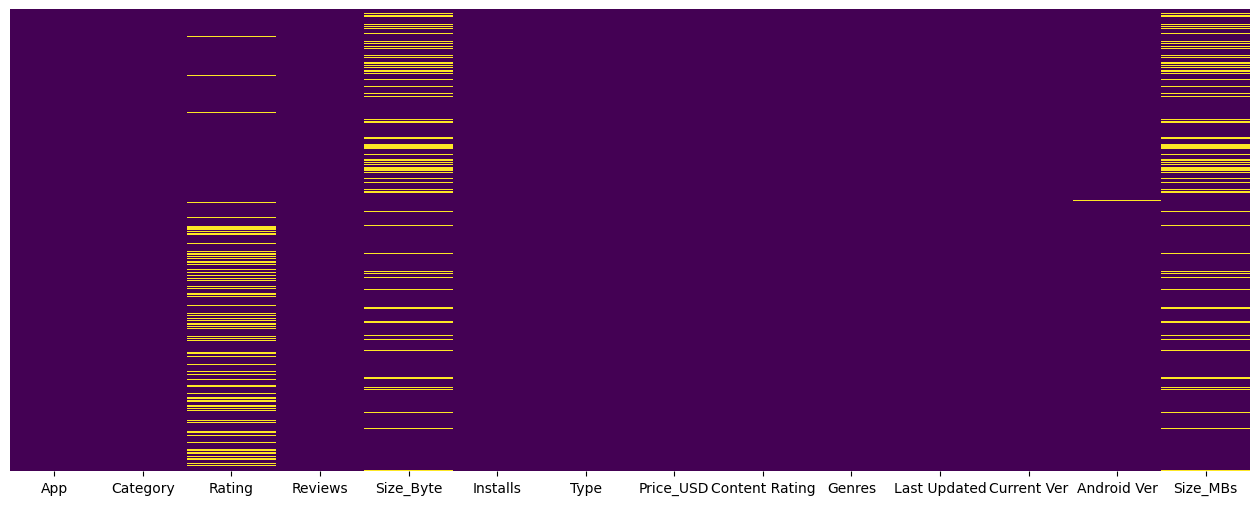

In [44]:
# plot missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values in each column')

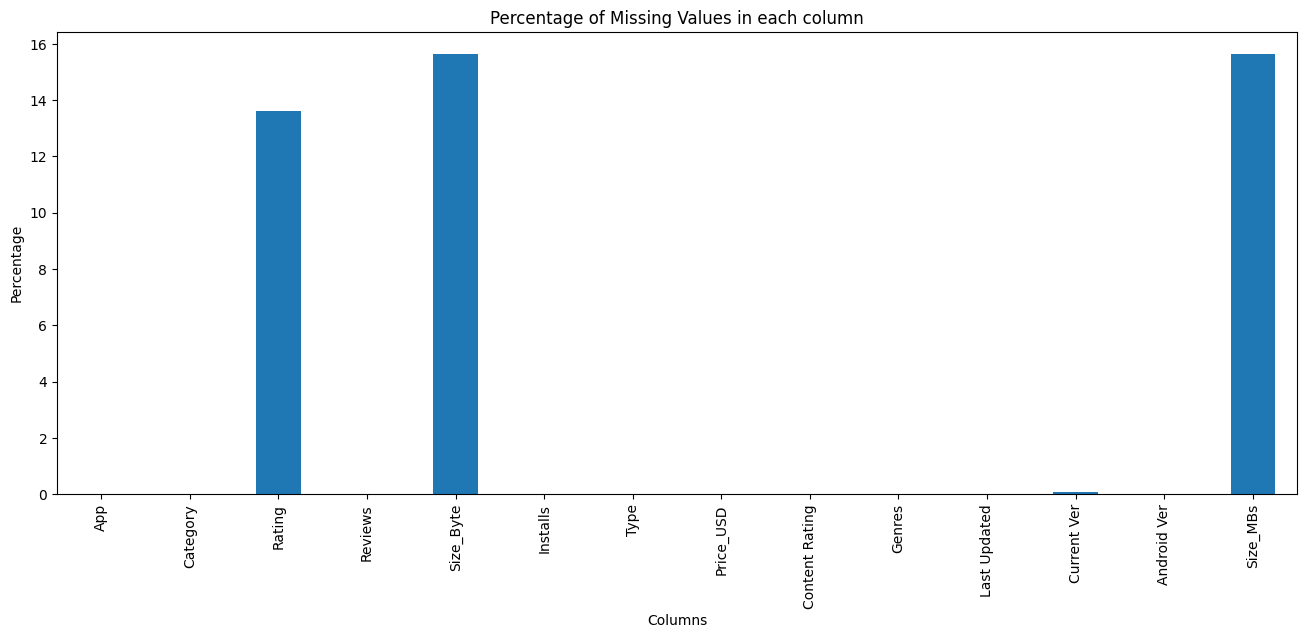

In [45]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title("Percentage of Missing Values in each column")

<Axes: >

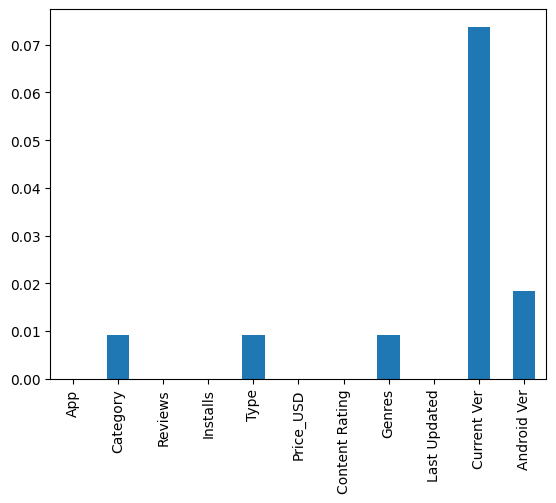

In [ ]:
# PLot of which have less than 1% missing values
missing_percentage[missing_percentage < 1].plot(kind='bar')
